In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys, os
sys.path.insert(0, '/home/niell_lab/Documents/GitHub/FreelyMovingEphys/')

In [3]:
from src.utils.auxiliary import flatten_series

In [4]:
psth_bins = np.arange(-1500, 1501)

In [5]:
df = pd.read_hdf('/home/niell_lab/Desktop/062921_G6HCK1ALTRN_control_Rig2_hf3_gratings_ephys_props-1.h5')

In [6]:
[x for x in df.columns if 'tuning' in x]

['Gt_contrast_tuning_bins',
 'Gt_contrast_tuning',
 'Gt_contrast_tuning_err',
 'Gt_pupilradius_tuning_bins',
 'Gt_pupilradius_tuning',
 'Gt_pupilradius_tuning_err',
 'Gt_theta_tuning_bins',
 'Gt_theta_tuning',
 'Gt_theta_tuning_err',
 'Gt_phi_tuning_bins',
 'Gt_phi_tuning',
 'Gt_phi_tuning_err',
 'Gt_ballspeed_tuning_bins',
 'Gt_ballspeed_tuning',
 'Gt_ballspeed_tuning_err',
 'Gt_ori_tuning_mean_tf',
 'Gt_ori_tuning_tf']

In [7]:
psths = flatten_series(df['Gt_grating_psth'])

In [8]:
def gt_modind(psth):
    psth = psth.astype(float)
    use = psth - np.mean(psth[1:5].copy())
    mod = np.max(np.abs(use[5:8]))
    return mod

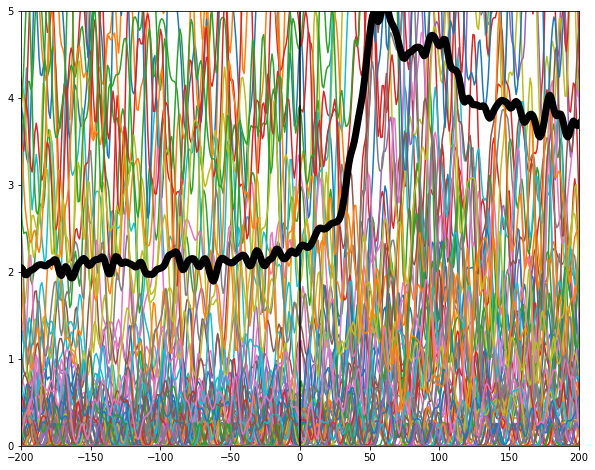

In [9]:
plt.figure(figsize=(10,8))
for i in range(len(df.index.values)):
    plt.plot(psth_bins, df['Gt_grating_psth'].iloc[i])
plt.plot(psth_bins, np.mean(psths, 0), 'k', linewidth=7)
plt.xlim(-200,200)
plt.ylim([0,5])
plt.vlines(0, 0, 20, 'k')

In [ ]:
tuning = df['Gt_ori_tuning_tf'].iloc[0].copy()

In [ ]:
tuning.shape

In [ ]:
tuning1 = np.roll(tuning.copy(), axis=(1), shift=3)

tf = 1
plt.plot(np.arange(8)*45, tuning1[:,0,tf], label='low sf')
plt.plot(np.arange(8)*45, tuning1[:,1,tf], label='mid sf')
plt.plot(np.arange(8)*45, tuning1[:,2,tf], label='high sf')
plt.legend()